# 4

In [1]:
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

if os.name=='nt':
    font_family='Malgun Gothic'
else:
    font_family='AppleGothic'
    
sns.set(font=font_family, rc={'axes.unicode_minus' : False})

In [2]:
s_x = np.linspace(-5, 100, 1000)
s_df = pd.DataFrame(s_x)

In [3]:
s_df.head()

,0
0,-5.000000
1,-4.894895
2,-4.789790
3,-4.684685
4,-4.579580


In [4]:
s_df_sqz = s_df.squeeze('columns')

In [5]:
sample_data = pd.DataFrame({
    'dist' : s_df_sqz.sample(1000),
    'type' : 'Data',
})
sample_mean_05 = pd.DataFrame({
    'dist' : [s_df_sqz.sample(5).mean() for _ in range(1000)],
    'type' : '5개 샘플평균'
})
sample_mean_10 = pd.DataFrame({
    'dist' : [s_df_sqz.sample(10).mean() for _ in range(1000)],
    'type' : '10개 샘플평균'
})
sample_mean_20 = pd.DataFrame({
    'dist' : [s_df_sqz.sample(20).mean() for _ in range(1000)],
    'type' : '20개 샘플평균'
})
sample_mean_30 = pd.DataFrame({
    'dist' : [s_df_sqz.sample(30).mean() for _ in range(1000)],
    'type' : '30개 샘플평균'
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_10, sample_mean_20, sample_mean_30])

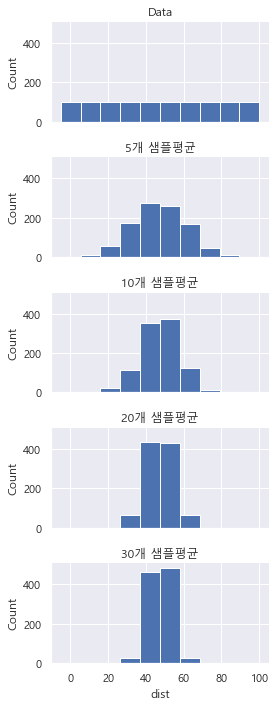

In [6]:
g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)

g.map(plt.hist, 'dist', range=[-5, 100], bins=10)
g.set_axis_labels('dist', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

In [7]:
norm = stats.norm(loc=50, scale=10)

s_x = np.linspace(-10, 120, 2000)
s_pdf = norm.pdf(s_x)

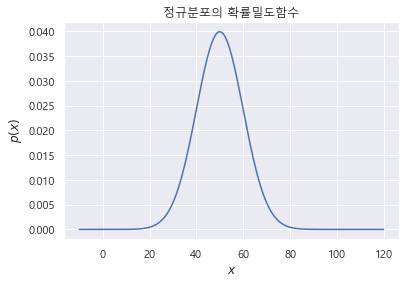

In [8]:
plt.plot(s_x, s_pdf)
plt.title('정규분포의 확률밀도함수')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.show()

In [13]:
bag_of_mean = []

for i in range(10):
    m = np.random.binomial(n=1, p=0.5, size=100).mean()
    bag_of_mean.append(m)

<AxesSubplot:ylabel='Frequency'>

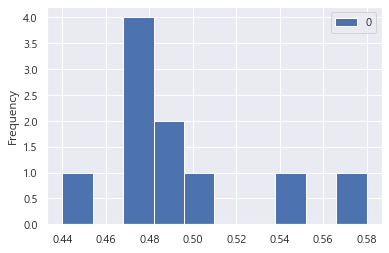

In [14]:
pd.DataFrame(bag_of_mean).plot.hist()     # random이라 매번 그래프가 달라짐

In [15]:
bag_of_mean = []

for i in range(500):
    m = np.random.binomial(n=1, p=0.5, size=100).mean()
    bag_of_mean.append(m)

<AxesSubplot:ylabel='Frequency'>

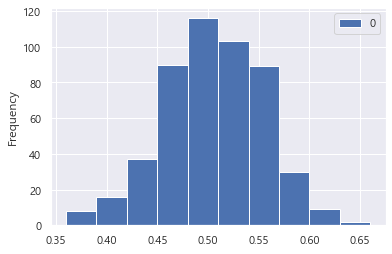

In [16]:
pd.DataFrame(bag_of_mean).plot.hist()

In [17]:
bag_of_mean = []

for i in range(1000):
    m = np.random.binomial(n=1, p=0.5, size=100).mean()
    bag_of_mean.append(m)

<AxesSubplot:ylabel='Frequency'>

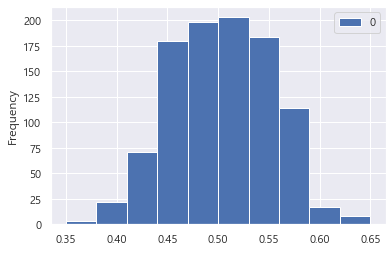

In [18]:
pd.DataFrame(bag_of_mean).plot.hist()

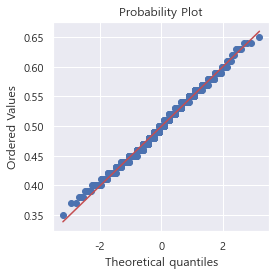

In [25]:
fig, ax = plt.subplots(figsize=(4,4))

# norm_sample = stats.norm.rvs(size=100)
stats.probplot(bag_of_mean, plot=ax)

plt.tight_layout()
plt.show()

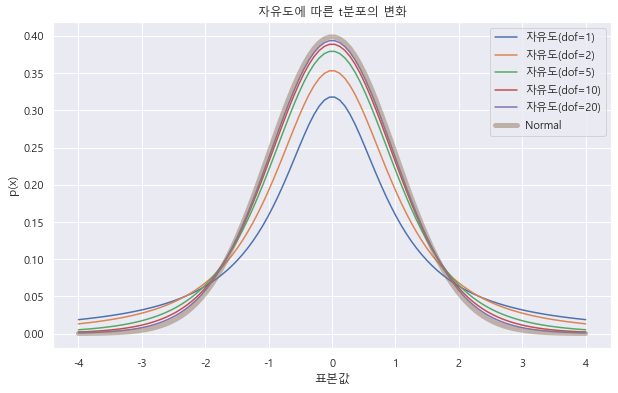

In [26]:
t_data = np.linspace(-4, 4, 100)

plt.figure(figsize=(10,6))

for dof in [1, 2, 5, 10, 20]:
    t_dist = stats.t(df=dof)
    plt.plot(t_data, t_dist.pdf(t_data), label=('자유도(dof=%d)' % dof))
    
plt.plot(t_data, stats.norm().pdf(t_data), label='Normal', lw=5, alpha=0.5)
plt.title('자유도에 따른 t분포의 변화')
plt.xlabel('표본값')
plt.ylabel('p(x)')
plt.legend()
plt.show()

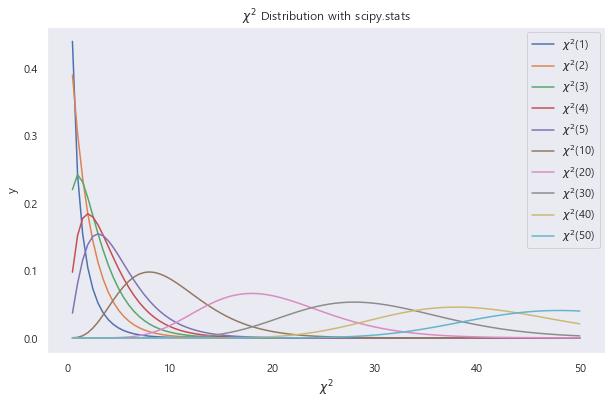

In [27]:
from scipy.stats import chi2

Chi_x = np.linspace(0.5, 50, 100)

plt.figure(figsize=(10, 6))

for dof in [1,2,3,4,5,10,20,30,40,50]:
    plt.plot(Chi_x, stats.chi2(dof).pdf(Chi_x), label=r'$\chi^2$(' + str(dof) + ')')
    
plt.xlabel(r'$\chi^2$')
plt.ylabel('y')
plt.grid()
plt.title(r'$\chi^2$ Distribution with scipy.stats')
plt.legend()
plt.show()

In [28]:
f_data = np.linspace(0.05, 3, 1000)

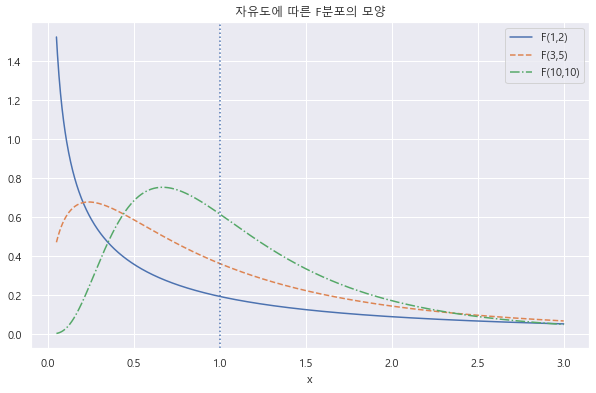

In [30]:
plt.figure(figsize=(10,6))
plt.plot(f_data, stats.f(1,2).pdf(f_data), ls="-", label='F(1,2)')
plt.plot(f_data, stats.f(3,5).pdf(f_data), ls="--", label='F(3,5)')
plt.plot(f_data, stats.f(10, 10).pdf(f_data), ls='-.', label='F(10,10)')
plt.axvline(1, ls=':')
plt.xlabel('x')
plt.title('자유도에 따른 F분포의 모양')
plt.legend()
plt.show()